In [1]:
# 使用KMeans进行聚类
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [9]:
# 数据加载
data = pd.read_csv('D:\data engine\数据分析训练营-结营考试\ProjectC/CarPrice_Assignment.csv')
train_x = data.drop(['CarName','car_ID'],axis=1)
print(train_x.shape)
print(train_x)

(205, 24)
     symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0            front       88.6      168.8  

In [18]:
# 将部分值改成数字，调用LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight',
        'curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
for column in columns:
    train_x[column] = le.fit_transform(train_x[column])
print(train_x)

     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0            5         1           0           1        0           2   
1            5         1           0           1        0           2   
2            3         1           0           1        2           2   
3            4         1           0           0        3           1   
4            4         1           0           0        3           0   
..         ...       ...         ...         ...      ...         ...   
200          1         1           0           0        3           2   
201          1         1           1           0        3           2   
202          1         1           0           0        3           2   
203          1         0           1           0        3           2   
204          1         1           1           0        3           2   

     enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0                 0          2         22         8

In [21]:
# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)

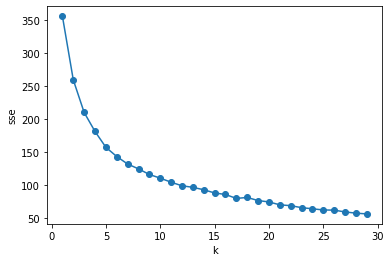

In [26]:
# K-Means 手肘法：统计不同K取值的误差平方和
import matplotlib.pyplot as plt
sse=[]
for k in range(1,30):
    #kmeans算法
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(train_x)
    #计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x=range(1,30)
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(x,sse,'o-')
plt.show()

In [32]:
### 使用KMeans聚类,k取12
kmeans=KMeans(n_clusters=12)
kmeans.fit(train_x)
predict_y=kmeans.predict(train_x)
predict_y
# 合并聚类结果，插入到原数据中
result=pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [38]:
result.to_csv("大众汽车竞品分析.csv",index=False,encoding = 'gbk')